In [1]:
'''
【课程3.5】  蒙特卡罗模拟

蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法
使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。
将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。
 
① π的计算
② 计算积分 y = x**2
③ 排队上厕所问题

'''

'\n【课程3.5】  蒙特卡罗模拟\n\n蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法\n使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。\n将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。\n \n① π的计算\n② 计算积分 y = x**2\n③ 排队上厕所问题\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pi:  3.158


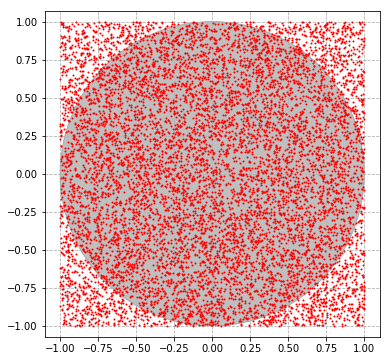

In [14]:
# π的计算

from matplotlib.patches import Circle

n = 10000
# 投点次数   次数越多，结果越准确

r = 1.0           # 半径
a, b = (0., 0.)   # 圆心
# 圆的信息

x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r
# 正方形区域边界

x = np.random.uniform(x_min, x_max, n) # 均匀分布
y = np.random.uniform(y_min, y_max, n)
# 在正方形区域内随机投点
# numpy.random.uniform(low,high,size) → 从一个均匀分布[low,high)中随机采样，均匀分布

d = np.sqrt((x-a)**2 + (y-b)**2)    #勾股定理
res = sum(np.where(d < r, 1, 0))   #小于1就返回1，否则返回0
# 计算点到圆心的距离
# 统计落在圆内的点的数目

pi = 4 * res / n   #正方形面积是4r2   圆形面积是pi r2
print('pi: ', pi)
# 计算 pi 的近似值 → Monte Carlo方法：用统计值去近似真实值

fig = plt.figure(figsize = (6,6))
axes = fig.add_subplot(1,1,1)
plt.plot(x,y,'ro',markersize = 1)
plt.axis('equal')
# 制图

circle = Circle(xy = (a,b),radius = r, alpha = 0.5 ,color = 'gray')
axes.add_patch(circle)
plt.grid(True, linestyle = "--",linewidth = "0.8")
plt.show()
# 绘制圆形

integral:  0.3368


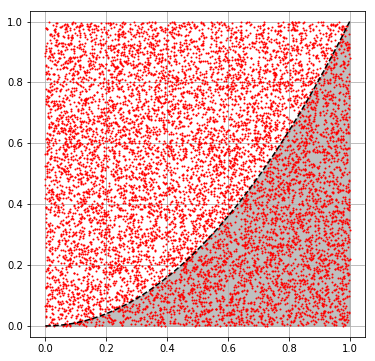

In [20]:
# 计算积分 y = x**2

n = 10000
# 投点次数

x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0   
# 矩形区域边界

x = np.random.uniform(x_min, x_max, n) # 均匀分布
y = np.random.uniform(y_min, y_max, n)
# 在矩形区域内随机投点

def f(x):
    return x**2
# 创建函数 y = x**2

res = sum(np.where(y < f(x), 1, 0))
# 统计 落在函数 y=x^2图像下方的点的数目

integral = res / n
print('integral: ', integral)
# 计算 定积分的近似值

fig = plt.figure(figsize = (6,6)) 
axes = fig.add_subplot(111) 
axes.plot(x, y,'ro',markersize = 1)
plt.axis('equal') 
# 绘制散点图

xi = np.linspace(0,1,100)
yi = xi ** 2
plt.plot(xi,yi,'--k')
plt.fill_between(xi, yi, 0, color ='gray',alpha=0.5,label='area')  
plt.grid()
# 绘制 y = x**2 面积图

------
第1个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.593755938293975 2.0748575571512324 2.2448675080917653 4.319725065242998 1.4811016188572574 

第2个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.8032858810817356 4.319725065242998 1.3431708554986397 5.662895920741637 3.5164391841612623 

第3个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 1.183905119954436 5.662895920741637 2.947424337013175 8.610320257754813 4.4789908007872015 

第4个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.0453219365972597 8.610320257754813 2.5008096682121197 11.111129925966932 6.564998321157553 

第5个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.0698367607585744 11.111129925966932 2.3573856615958246 13.468515587562756 9.041293165208357 

第6个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.45582026128936 13.468515587562756 2.212943769881136 15.681459357443892 11.012695326273395 

第7个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.244225943656304 15.681459357443892 2.9515317757316755 18.632991133175565 11.437233413787588 

第8个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.635398796462907 18.632991133175565 2.379436359114074 21.0124274

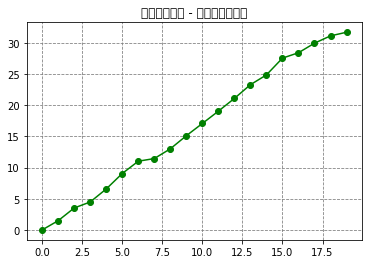

In [26]:
# 厕所排队问题
# 1、两场电影结束时间相隔较长，互不影响；
# 2、每场电影结束之后会有20个人想上厕所；
# 3、这20个人会在0到10分钟之内全部到达厕所）；
# 4、每个人上厕所时间在1-3分钟之间
# 首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行。
# 分析：对于每个人都有如下几个参数：
# 到达时间 / 等待时间 / 开始上厕所时间 / 结束时间

arrivingtime = np.random.uniform(0,10,size = 20)
arrivingtime.sort()
workingtime = np.random.uniform(1,3,size = 20)
# np.random.uniform 随机数：均匀分布的样本值

startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptytime = [0 for i in range(20)]
# 开始时间都是0

#print('arrivingtime\n',arrivingtime,'\n')
#print('workingtime\n',workingtime,'\n')
#print('startingtime\n',startingtime,'\n')
#print('finishtime\n',finishtime,'\n')
#print('waitingtime\n',waitingtime,'\n')
#print('emptytime\n',emptytime,'\n')
print('------')

startingtime[0] = arrivingtime[0]  # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + workingtime[0]   # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0]-arrivingtime[0]   # 第一个人不用等待

for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print('第%d个人：到达时间 开始时间 “工作”时间 完成时间 等待时间\n' %i,
          arrivingtime[i],
          startingtime[i],
          workingtime[i],
          finishtime[i],
          waitingtime[i],
         '\n')
print('arerage waiting time is %f' %np.mean(waitingtime))
print('------')
# 判断：如果下一个人在上一个人完成之前到达，则 开始时间 = 上一个人完成时间，
# 否则 开始时间 = 到达时间，且存在空闲时间 = 到达时间 - 上一个人完成时间

fig = plt.figure(figsize = (6,4))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = '0.8')
plt.title('蒙特卡罗模拟 - 排队上厕所问题')
plt.show()
# 图表绘制